# PRML 第1章

## 1.1 Polynomial Curve Fitting

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [16]:
def f(x):
    """
    Parameters
    ----------
    x : array-like, shape (1, -1)
    
    Return 
    ----------
    sin(2\pix) : array-like
    
    """
    
    pi = math.pi
    return np.sin(2*pi*x)


def fit_polynomial_curve(X, y, M, regr):
    
    poly = PolynomialFeatures(M)
    X_poly = poly.fit_transform(X)
    regr.fit(X_poly, y)
    return regr


def visualize(X, y, f, regr, plt, M):
    
    X_ = np.arange(0, 1, 0.01).reshape(-1, 1)
    
    poly = PolynomialFeatures(M)
    X_poly = poly.fit_transform(X_)
    
    plt.ylim([-1.5, 1.5])
    plt.scatter(X, y, marker='o', c='blue',alpha=0.5)
    plt.plot(X_, f(X_), c='lime')
    plt.plot(X_, regr.predict(X_poly), c='r', label=str(M))
    plt.legend(loc='best')
    return plt

def noise(n_sample, var=0.3):
    return np.random.normal(0,var,n_sample)

In [29]:
def main():
    
    global plt
    
    n_sample = 10
    M_list = [0, 1, 3, 9]

    X = np.arange(0, 1, 1/n_sample).reshape(-1, 1)
    X_ = np.arange(0, 1, 0.01).reshape(-1, 1)

    y = f(X) + noise(n_sample, var=0.3).reshape(-1, 1)
    
    result = []
    
    for M in M_list:
        regr = LinearRegression(fit_intercept=False)
        regr = fit_polynomial_curve(X, y, M, regr)
        plt = visualize(X, y, f, regr, plt, M)
        result.append([regr, plt])
        plt.show()
    
    return result

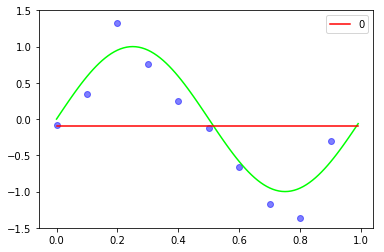

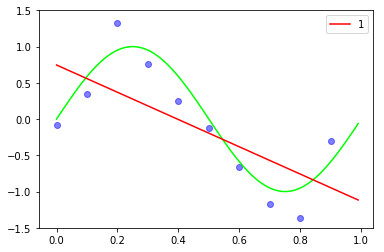

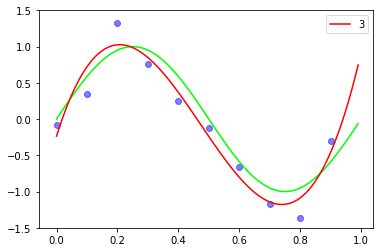

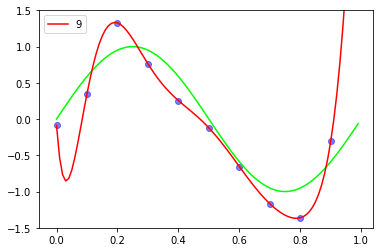

In [30]:
if __name__ == "__main__":
    result = main()